In [1]:
# Synthetic dataset
from sklearn.datasets import make_classification
# Data processing
import pandas as pd
import numpy as np
from collections import Counter
# Visualization
import matplotlib.pyplot as plt
# Model and performance
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [2]:
# Create an imbalanced dataset
x, y = make_classification(n_samples=100000, n_features=2, n_informative=2,
                           n_redundant=0, n_repeated=0, n_classes=2,
                           n_clusters_per_class=1,
                           weights=[0.995, 0.005],
                           class_sep=0.5, random_state=0)

In [3]:
# Convert the data from numpy array to pandas data frame
df = pd.DataFrame({'feature1':x[:,0],'feature2':x[:,1],'target':y})

In [4]:
def unique (list1):
    unique_list = []
    for x in list1:
        if x not in unique_list:
            unique_list.append(x)
    for x in unique_list:
        print(x)
unique(y)

0
1


In [5]:
df

,feature1,feature2,target
0,1.236497,0.579272,0
1,-0.188720,-0.022001,0
2,-0.653844,0.794309,0
3,0.005572,0.593370,0
4,0.482573,0.796902,0
...,...,...,...
99995,-1.377568,0.659066,0
99996,-0.252317,0.346224,0
99997,-0.700496,0.308327,0
99998,-1.638941,0.351496,0


In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
len(np.unique(X_train))

160000

In [8]:
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])

The number of records in the training dataset is 80000


In [9]:
print('The number of records in the test dataset is', X_test.shape[0])

The number of records in the test dataset is 20000


In [10]:
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The training dataset has 79183 records for the majority class and 817 records for the minority class.


In [11]:
sorted(Counter(y_train).items())[0][1]

79183

In [12]:
# Train the one class support vector machine (SVM) model
one_class_svm = OneClassSVM(nu=0.01, kernel = 'rbf', gamma = 'auto').fit(X_train)

In [27]:
# Predict the anomalies
prediction = one_class_svm.predict(X_test)

In [29]:
# Change the anomalies' values to make it consistent with the true values
prediction = [1 if i==-1 else 0 for i in prediction]

In [15]:
# Check the model performance
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19787
           1       0.06      0.06      0.06       213

    accuracy                           0.98     20000
   macro avg       0.53      0.53      0.53     20000
weighted avg       0.98      0.98      0.98     20000



In [16]:
print("The accuracy score predicted is {}".format(accuracy_score(y_test, prediction)))


The accuracy score predicted is 0.98


In [17]:
# Get the scores for the testing dataset
score = one_class_svm.score_samples(X_test)

In [18]:
score

array([197.69111487, 198.31941148, 189.98216992, ..., 199.91503967,
       197.73126188, 193.99740923])

In [20]:
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)

In [21]:
score_threshold

182.61864023453066

In [31]:
# Check the score for 2% of outliers
score_threshold = np.percentile(score, 2)
print(f'The customized score threshold for 2% of outliers is {score_threshold:.2f}')

The customized score threshold for 2% of outliers is 182.62


In [32]:
# Check the model performance at 2% threshold
customized_prediction = [1 if i < score_threshold else 0 for i in score]


In [33]:
# # Check the prediction performance
print(classification_report(y_test, customized_prediction))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     19787
           1       0.06      0.10      0.07       213

    accuracy                           0.97     20000
   macro avg       0.52      0.54      0.53     20000
weighted avg       0.98      0.97      0.98     20000



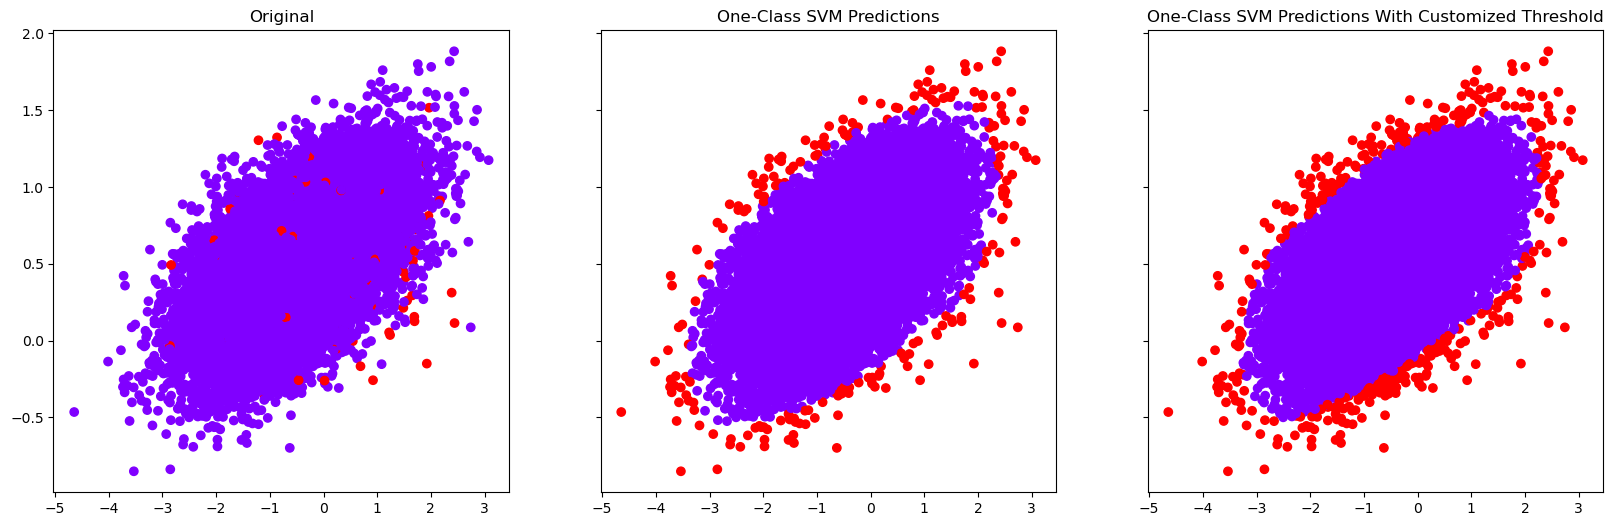

In [34]:
# Put the testing dataset and predictions in the same dataframe
df_test = pd.DataFrame(X_test, columns=['feature1', 'feature2'])
df_test['y_test'] = y_test
df_test['one_class_svm_prediction'] = prediction
df_test['one_class_svm_prediction_cutomized'] = customized_prediction
# Visualize the actual and predicted anomalies
fig, (ax0, ax1, ax2)=plt.subplots(1,3, sharey=True, figsize=(20,6))
# Ground truth
ax0.set_title('Original')
ax0.scatter(df_test['feature1'], df_test['feature2'], c=df_test['y_test'], cmap='rainbow')
# One-Class SVM Predictions
ax1.set_title('One-Class SVM Predictions')
ax1.scatter(df_test['feature1'], df_test['feature2'], c=df_test['one_class_svm_prediction'], cmap='rainbow')
# One-Class SVM Predictions With Customized Threshold
ax2.set_title('One-Class SVM Predictions With Customized Threshold')
ax2.scatter(df_test['feature1'], df_test['feature2'], c=df_test['one_class_svm_prediction_cutomized'], cmap='rainbow')

#### Using generated data set. The samples are drawn from a Gaussian distribution.  The function returns two arrays: one containing the feature vectors (i.e., the input data) and the other containing the class labels (i.e., the output data).

In [37]:
import random
from sklearn.datasets import make_blobs



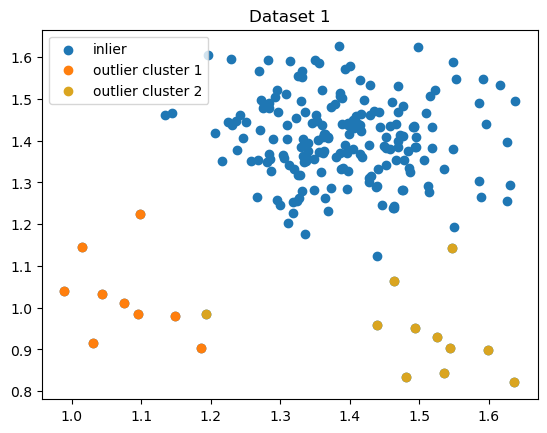

In [59]:
random.seed(13)
seed = 0
x, y = make_blobs(n_samples=190, centers=1, cluster_std=.1, center_box=(1.4, 1.4), random_state=seed)

out1x, out1y = make_blobs(n_samples=9, centers=1, cluster_std=.1, center_box=(1, 1), random_state=seed)
out2x, out2y = make_blobs(n_samples=11, centers=1, cluster_std=.1, center_box=(3.2, 0.01), random_state=seed)

plt.show()

# prepare data for One-Class model
y[y == 0] = 1
out1y[out1y==0] = -1 
out2y[out2y==0] = -1 

x = np.append(x, out1x, axis = 0)
y = np.append(y, out1y, axis = 0)

x = np.append(x, out2x, axis = 0)
y = np.append(y, out2y, axis = 0)

# Plot to see data
plt.scatter(x[:,0], x[:,1], label='inlier')
plt.scatter(out1x[:,0], out1x[:,1], label='outlier cluster 1')
plt.scatter(out2x[:,0], out2x[:,1], label='outlier cluster 2', color='goldenrod')

plt.title('Dataset 1')
plt.legend()
plt.show()
dataset_list = []
# Add data to dataset_list
dataset_list.append([x,y])

In [60]:
# Convert the data from numpy array to a pandas dataframe
df1 = pd.DataFrame({'feature1': x[:, 0], 'feature2': x[:, 1], 'target': y})
# Check the target distribution
df1['target'].value_counts(normalize = True)

 1    0.904762
-1    0.095238
Name: target, dtype: float64

In [61]:
df1

,feature1,feature2,target
0,1.295475,1.521115,1
1,1.337191,1.351897,1
2,1.464331,1.242938,1
3,1.349035,1.356193,1
4,1.477325,1.281612,1
...,...,...,...
205,1.463689,1.063973,-1
206,1.480592,0.833136,-1
207,1.547159,1.142635,-1
208,1.544294,0.903410,-1


In [64]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
# Check the number of records
print('The number of records in the training dataset is', X_train.shape[0])
print('The number of records in the test dataset is', X_test.shape[0])
print(f"The training dataset has {sorted(Counter(y_train).items())[0][1]} records for the majority class and {sorted(Counter(y_train).items())[1][1]} records for the minority class.")

The number of records in the training dataset is 168
The number of records in the test dataset is 42
The training dataset has 15 records for the majority class and 153 records for the minority class.


In [68]:
# Train the one class support vector machine (SVM) model
one_class_svm1 = OneClassSVM(nu=0.1, kernel = 'rbf', gamma = 'auto').fit(X_train)

In [69]:
# Predict the anomalies
prediction = one_class_svm1.predict(X_test)
# Change the anomalies' values to make it consistent with the true values
#prediction = [1 if i==-1 else 0 for i in prediction]
# Check the model performance
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         5
           1       0.88      1.00      0.94        37

    accuracy                           0.88        42
   macro avg       0.44      0.50      0.47        42
weighted avg       0.78      0.88      0.83        42



C:\Users\Gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Gokul\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
print("The accuracy score predicted is {}".format(accuracy_score(y_test, prediction)))


The accuracy score predicted is 0.8809523809523809
